In [ ]:
import os
import shutil
import random


source_dir = "Animals_with_Attributes2/JPEGImages"  
target_dir = "Animals_with_Attributes2/SelectedImages"  
selected_classes = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]  

num_samples = 650


os.makedirs(target_dir, exist_ok=True)


for cls in selected_classes:
    cls_source_path = os.path.join(source_dir, cls)
    cls_target_path = os.path.join(target_dir, cls)
    os.makedirs(cls_target_path, exist_ok=True)

    
    files = os.listdir(cls_source_path)
    selected_files = random.sample(files, num_samples)

   
    for file in selected_files:
        shutil.copy(os.path.join(cls_source_path, file), cls_target_path)

print("Seçilen sınıflar başarıyla işlendi!")




os: Dosya ve dizin işlemleri yapmamızı sağlayan kütüphane.
shutil: Dosya kopyalama işlemleri için kullanılır.
random: Rastgele seçimler yapmak için kullanılması gerekir. Bu işlem çok önemli olmakla birlikte ana dizinden alacağımız 650 örneğin rastgele olmasını sağlar
Kaynak ve Hedef Dizinler:

source_dir: Orijinal veri setinin bulunduğu klasör.
target_dir: Seçilen dosyaların taşınacağı yeni klasör.
selected_classes: Seçmek istediğimiz sınıfların listesi.
Örnek Sayısı:650.

num_samples: Her sınıftan kaç adet dosya seçileceğini belirler.
Hedef Klasörün Oluşturulması:

os.makedirs(): Hedef dizini oluşturur. Eğer dizin zaten varsa, hata vermez.
Dosyaların Seçilmesi ve Kopyalanması:

Kod, her bir sınıf için kaynak dizinde bulunan dosyaları rastgele seçer (random.sample() ile).
Seçilen dosyalar, shutil.copy() ile hedef dizine kopyalanır.
İşlemin Tamamlanması:

Kod, tüm işlemler bittikten sonra "Seçilen sınıflar başarıyla işlendi!" mesajını ekrana yazdırır.
Bu işlem, belirttiğiniz sınıflardan her birinden rastgele 650 resim seçip yeni bir dizine taşır.

Bu aşamada her bir sınıftan bir görsel oluşturuyoruz.
Hedef Dizin ve Sınıfların Listeye Alınması:


classes: Bu dizindeki her bir alt klasörün (sınıfların) ismini alır.
Rastgele Görsel Seçimi ve Görselleştirme:

Bu kod, her bir sınıf için bir döngü başlatır ve her sınıfın içinden rastgele bir resim seçer.
Her seçilen resmin yolu belirlenir.
Görüntülerin Görselleştirilmesi:

Seçilen resimler açılır ve belirli bir düzen içinde (2 satır ve 5 sütun) alt grafiklerde gösterilir.
Her bir resmin başlığı olarak sınıf adı eklenir,eksenler ve ızagara görünümü gizlenir.
Sonuçların Düzenlenmesi ve Gösterilmesi:

Görseller arasındaki boşluklar otomatik olarak düzenlenir.
Son olarak, görseller ekranda gösterilir.
Sonuç:
Bu kod, her sınıftan rastgele bir resim seçer ve bunları 2 satır 5 sütunluk bir düzenle ekranda görüntüler.

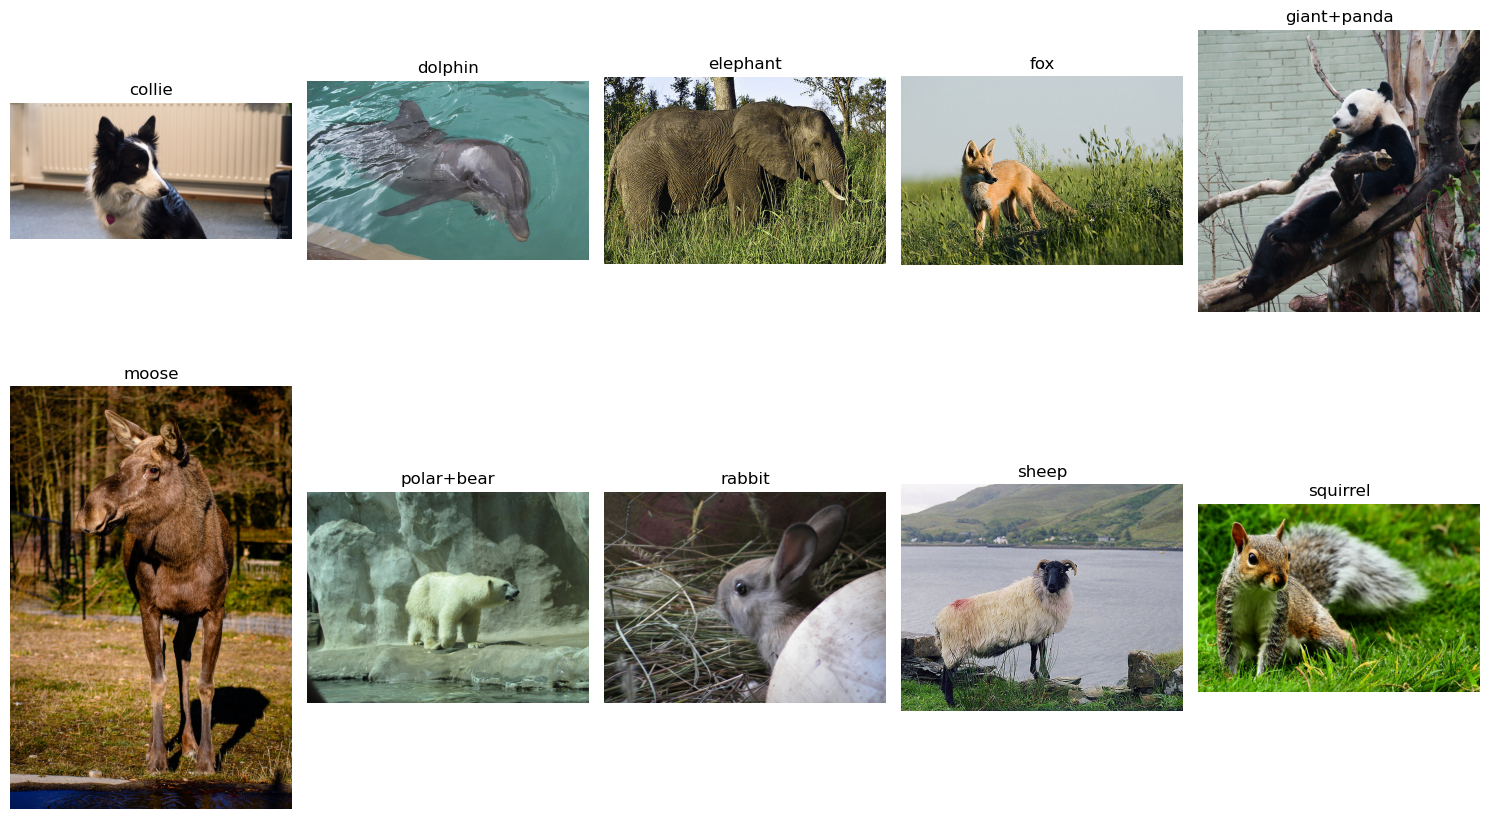

In [5]:

from PIL import Image
import matplotlib.pyplot as plt


target_dir = "Animals_with_Attributes2/SelectedImages"


classes = os.listdir(target_dir)


plt.figure(figsize=(15, 10))  
for i, cls in enumerate(classes):
    cls_path = os.path.join(target_dir, cls)
    image_file = random.choice(os.listdir(cls_path))  
    image_path = os.path.join(cls_path, image_file)

    
    image = Image.open(image_path)
    plt.subplot(2, 5, i + 1)  
    plt.imshow(image)
    plt.title(cls, fontsize=12)  
    plt.axis('off')  

plt.tight_layout()
plt.show()

for cls in os.listdir(target_dir): Hedef dizindeki her bir alt klasör (sınıf) için işlem yapılır.
Klasör Kontrolü: Yerelde çalıştığım için bu işlem gerekli. 

if not os.path.isdir(cls_source_path): Eğer klasör değilse (örneğin, geçici dosya veya sistem dosyası gibi) o sınıfı atlar.
Görüntü Dosyalarının İşlenmesi:

for image_file in os.listdir(cls_source_path): Her sınıftaki resimler üzerinde işlem yapılır.
valid_extensions: Yalnızca geçerli resim dosya uzantılarıyla işlem yapılmasını sağlar (örneğin, .jpg, .png).
if not any(image_file.lower().endswith(ext) for ext in valid_extensions): Eğer dosya geçerli bir resim değilse, o dosya atlanır.
Görüntü Yükleme ve RGB Formatına Dönüştürme:

image = Image.open(image_path).convert("RGB"): Görüntü açılır ve RGB formatına dönüştürülür (eğer resim başka bir renk formatındaysa).
Görüntüyü Numpy Dizisine Dönüştürme ve Normalizasyon:

image_array = np.array(image, dtype=np.float32) / 255.0: Görüntü numpy dizisine dönüştürülür ve 0-1 arası bir değere normalleştirilir.
Normalleştirilmiş Görüntüyü Tekrar Görüntüye Çevirme:

normalized_image = Image.fromarray((image_array * 255).astype(np.uint8)): Normalleştirilmiş numpy dizisi tekrar resme dönüştürülür.
Görüntü Kaydetme:

normalized_image.save(image_path): Normalleştirilmiş resim, orijinal dosyanın üzerine kaydedilir.
Hata Yönetimi:

Eğer bir hata oluşursa, except bloğu çalışır ve hatanın ne olduğunu belirten bir mesaj ekrana yazdırılır.

Bu kod, belirli bir dizindeki her bir sınıfın içindeki resimleri işler, her resmi RGB formatına dönüştürür, normalleştirir (0-1 arası değerler) ve ardından orijinal dosyanın üzerine kaydeder. Hata meydana geldiğinde, o dosya işlenemediği hakkında bilgi verilir.
Normalleştirme işlemi nedir ? 
 Görüntü verisini normalleştirme işlemi, modelin daha hızlı ve verimli öğrenmesine yardımcı olmak için yaygın olarak kullanılan bir tekniktir. Görüntü verisini normalleştirmek, genellikle resimlerin piksellerinin değerlerini belirli bir aralığa (örneğin, 0 ile 1 arasında) sıkıştırmak anlamına gelir. Bunun, modelin eğitim sürecinde çeşitli avantajları vardır. Normalleştirme işlemi, genellikle piksellerin değerlerini 0 ile 1 arasında bir aralığa çekmek amacıyla yapılır. Bu işlem, görüntülerin her bir kanalındaki (RGB) değerlerin 0-255 aralığından 0-1 aralığına dönüştürülmesini sağlar.
 0 ve 255 değerleri nedir ? 
 Görüntülerdeki 0 ve 255 değerleri, her bir pikselin renk yoğunluğunu temsil eder. Bu değerler, genellikle bir pikselin RGB (Red, Green, Blue) renk kanalındaki ışık yoğunluğunu belirtir.
 0 değeri: 
 0, bir kanalın tamamen kapalı olduğu veya karanlık olduğu durumu ifade eder.
Yani, bir renk kanalındaki değerin 0 olması, o kanalın yok olduğu veya sıfır ışık yoğunluğuna sahip olduğu anlamına gelir.
Örneğin, bir pikselin kırmızı kanalının değeri 0 olduğunda, bu pikselde kırmızı renk bulunmaz.
255 Değeri:

255, bir kanalın tam yoğunlukta ışık yaydığı, yani beyaz veya o rengin maksimum parlaklık seviyesinde olduğu durumu ifade eder.
Bu, bir renk kanalının en parlak haliyle olduğunu gösterir. 255, kanalın tam anlamıyla aktif olduğu veya en yüksek ışık seviyesine sahip olduğu değeri temsil eder.
Örneğin, bir pikselin kırmızı kanalının değeri 255 olduğunda, bu, o pikselde maksimum kırmızı renk yoğunluğu olduğu anlamına gelir.

 

In [1]:

import numpy as np
from PIL import Image


target_dir = "Animals_with_Attributes2/SelectedImages"


for cls in os.listdir(target_dir):
    cls_source_path = os.path.join(target_dir, cls)

    
    if not os.path.isdir(cls_source_path):
        continue  # Klasör değilse atla (örneğin, .ipynb_checkpoints gibi)

    
    for image_file in os.listdir(cls_source_path):
        
        valid_extensions = [".jpg", ".jpeg", ".png", ".bmp", ".gif"]
        if not any(image_file.lower().endswith(ext) for ext in valid_extensions):
            continue

        image_path = os.path.join(cls_source_path, image_file)

        try:
            
            image = Image.open(image_path).convert("RGB")  # RGB formatına dönüştür

            
            image_array = np.array(image, dtype=np.float32) / 255.0  # 0-1 arası normalize

            
            normalized_image = Image.fromarray((image_array * 255).astype(np.uint8))

          
            normalized_image.save(image_path)

        except Exception as e:
            print(f"Hata: {image_path} işlenemedi. {str(e)}")



train_test_split (sklearn.model_selection):

Bu fonksiyon, veri setini eğitim ve test setlerine ayırmak için kullanılır. Genellikle modelin eğitilmesi ve doğruluğunun test edilmesi amacıyla verilerin farklı setlere bölünmesi gereklidir. Bu fonksiyon verileri karıştırarak (shuffling) belirli bir oranla ikiye böler.
shutil:

shutil kütüphanesi, dosya işlemleri için kullanılır. Bu örnekte, veri setindeki görüntü dosyalarını bir dizinden başka bir dizine kopyalamak için kullanılmıştır. shutil.copy fonksiyonu, bir dosyayı belirli bir hedef dizine kopyalar.
Ana veri setinin ve çıkış dizinlerinin belirlenmesi:

data_dir değişkeni, ana veri setinin bulunduğu dizini belirtir. Bu dizin içerisinde her bir sınıf için ayrı klasörler vardır (örneğin, "kedi", "köpek").
train_dir ve test_dir değişkenleri, eğitim ve test veri setlerinin dosya yapısını oluşturacak çıkış dizinleridir.
Eğitim ve test setleri için dizinlerin oluşturulması:

os.makedirs fonksiyonu ile belirtilen çıkış dizinleri (eğitim ve test dizinleri) oluşturulur. Eğer bu dizinler zaten varsa, hata vermeden devam edilir.
Sınıf klasörlerinin kontrol edilmesi:

os.listdir(data_dir) fonksiyonu, ana veri setindeki tüm klasörlerin (sınıfların) adlarını listelemenizi sağlar. Her klasör, belirli bir kategoriyi (örneğin, hayvan türünü) temsil eder.
Kod, yalnızca klasörleri işler ve dosyaları atlar (örneğin, yanlışlıkla eklenmiş bir dosya varsa).
Her sınıf için eğitim ve test dizinlerinin oluşturulması:

train_cls_dir ve test_cls_dir, her bir sınıf için eğitim ve test veri setlerinin saklanacağı dizinlerdir. Bu dizinler, ilgili sınıfın adıyla oluşturulur. Örneğin, "kedi" sınıfı için train/kedi ve test/kedi dizinleri oluşturulur.
Görüntülerin alınması ve karıştırılması:

Her sınıf klasöründeki görüntüler .jpg, .jpeg, .png, .bmp ve .gif uzantılarına sahip dosyalar olarak alınır.
random.shuffle(images) fonksiyonu, görüntülerin sırasını karıştırır. Bu, modelin daha genel bir şekilde öğrenmesini sağlar ve veri setinin sırasına bağımlı olmasını engeller.
Eğitim ve test verilerinin ayıran işleminin yapılması:

train_test_split(image_paths, test_size=1-train_ratio, random_state=42) fonksiyonu, görüntü dosyalarını eğitim ve test verilerine böler. train_ratio ile belirlenen orana göre, verilerin %80'i eğitim, %20'si test için ayrılır. random_state=42 parametresi, aynı veriyi her çalıştırmada yeniden elde etmek için sabit bir karıştırma işlemi sağlar.
Eğitim ve test verilerinin kopyalanması:

Ayrılan eğitim görüntüleri, shutil.copy(image_path, os.path.join(train_cls_dir, os.path.basename(image_path))) ile ilgili eğitim dizinine kopyalanır.
Test verileri de benzer şekilde, shutil.copy(image_path, os.path.join(test_cls_dir, os.path.basename(image_path))) ile test dizinine kopyalanır. Bu işlem, her sınıf için yapılır.

Bu kod, bir klasörde bulunan görüntü dosyalarını, belirli bir oranla eğitim ve test veri setlerine ayırır. Verilerin doğru şekilde ayrılması, modelin doğru şekilde eğitilmesi ve test edilmesi için önemlidir. Görüntüler her sınıf için ayrı dizinlere kopyalanarak düzenlenir. Bu işlem, modelin daha iyi performans göstermesi için gereklidir çünkü eğitim verisi, modelin öğrenmesini sağlarken, test verisi modelin doğruluğunu ölçmek için kullanılır.

In [18]:

from sklearn.model_selection import train_test_split
import shutil

# Ana veri seti dizini
data_dir = "Animals_with_Attributes2/SelectedImages"

# Eğitim ve test setlerinin çıkacağı klasörler
train_dir = "train"
test_dir = "test"


train_ratio = 0.8


os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)


for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    
    
    if not os.path.isdir(cls_path):
        continue

    
    train_cls_dir = os.path.join(train_dir, cls)
    test_cls_dir = os.path.join(test_dir, cls)
    os.makedirs(train_cls_dir, exist_ok=True)
    os.makedirs(test_cls_dir, exist_ok=True)

    
    images = [f for f in os.listdir(cls_path) if f.lower().endswith((".jpg", ".jpeg", ".png", ".bmp", ".gif"))]

    
    random.shuffle(images)

    
    image_paths = [os.path.join(cls_path, img) for img in images]

    
    train_paths, test_paths = train_test_split(image_paths, test_size=1-train_ratio, random_state=42)

    
    for image_path in train_paths:
        shutil.copy(image_path, os.path.join(train_cls_dir, os.path.basename(image_path)))

    
    for image_path in test_paths:
        shutil.copy(image_path, os.path.join(test_cls_dir, os.path.basename(image_path)))


train_datagen):
Eğitim verisi üzerinde çeşitli dönüşümler (augmentasyon) yapılarak, modelin daha genelleştirilmiş ve sağlam olmasına yardımcı olunur. Veri artırma, aynı veriyi farklı şekillerde modelin görmesini sağlayarak, modelin overfitting (aşırı öğrenme) yapmasını engeller. Bu işlem şu adımlarla yapılır:

Rescaling (Normalizasyon): rescale=1./255

Görüntülerin piksel değerleri genellikle 0 ile 255 arasında olur. Modelin daha verimli bir şekilde öğrenebilmesi için bu değerler 0 ile 1 arasına çekilir. Bunu, her piksel değerini 255'e bölerek yaparız.
Dönme (Rotation): rotation_range=40

Görüntüleri rastgele döndürerek, modelin dönecek şekilde eğitilmesini sağlar. Bu özellik, 0 ile 40 derece arasında rastgele bir dönüş açısı uygular. Modelin farklı açılarda gelen verileri de öğrenmesine yardımcı olur.
Yatay Kaydırma (Width Shift): width_shift_range=0.2

Görüntüleri yatay yönde (sol ve sağa) kaydırarak veri setini çeşitlendirir. Bu özellik, görüntülerin yatay eksende %20 oranında kaydırılmasını sağlar.
Dikey Kaydırma (Height Shift): height_shift_range=0.2

Görüntüleri dikey yönde (yukarı ve aşağıya) kaydırarak farklı perspektifler sunar. Bu da yatay kaydırmaya benzer şekilde %20 oranında kaydırılmasını sağlar.
Yırtma (Shear): shear_range=0.2

Görüntüyü yırtık bir şekilde kaydırarak, perspektif değiştirme işlemi yapar. Yırtık, geometrik bir dönüşümle görüntünün eğilmesini ifade eder.
Zoom (Yakınlaştırma): zoom_range=0.2

Görüntüyü rastgele zoom yaparak büyütür veya küçültür. Bu, modelin farklı ölçeklerdeki nesneleri öğrenmesini sağlar.
Yatay Çevirme (Horizontal Flip): horizontal_flip=True

Görüntüyü yatay eksende ters çevirir. Bu, özellikle simetrik nesneler için faydalıdır çünkü model her iki yönü de öğrenebilir.
Doldurma Modu (Fill Mode): fill_mode='nearest'

Veri artırma işlemleri sırasında, görüntü kaydırıldığında ya da döndürüldüğünde ortaya çıkan boş alanların nasıl doldurulacağını belirtir. Bu ayarda, boş alanlar komşu piksellerle en yakın değerle doldurulur.
Test Verisi İçin Veri İşleme (test_datagen):
Test verisi için genellikle yalnızca normalizasyon işlemi yapılır, çünkü test verileri üzerinde veri artırma yapılmaz. Modelin doğruluğunu değerlendirirken, test verisinin orijinal hali korunur. Bu yüzden yalnızca rescale=1./255 ile normalizasyon yapılır. Bu işlem, test görüntülerindeki piksel değerlerini 0 ile 1 arasına çeker.

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,        
    rotation_range=40,     
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range=0.2,       
    zoom_range=0.2,        
    horizontal_flip=True,  
    fill_mode='nearest'    
)


test_datagen = ImageDataGenerator(rescale=1./255)


Bu kod, ImageDataGenerator ile eğitim ve test verilerini yükler ve işler.

Eğitim Verisi Yükleyici (train_generator):
train_datagen.flow_from_directory(): Eğitim verilerini belirtilen klasörden yükler, resimleri 224x224 boyutuna getirir, her seferinde 32 görüntü işler ve veri artırma (rotation, shift, flip) uygular.
class_mode='categorical': Etiketleri one-hot encoding formatında döndürür.
Test Verisi Yükleyici (test_generator):
test_datagen.flow_from_directory(): Test verilerini yükler, resimleri 224x224 boyutuna getirir ve sadece normalizasyon uygular.
class_mode='categorical': Etiketleri one-hot encoding formatında döndürür.
Bu yapı, verilerin uygun şekilde işlenmesini ve modele sunulmasını sağlar.

In [22]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_generator = train_datagen.flow_from_directory(
    'train',               
    target_size=(224, 224),
    batch_size=32,         
    class_mode='categorical' 
)

test_generator = test_datagen.flow_from_directory(
    'test',                
    target_size=(224, 224),
    batch_size=32,         
    class_mode='categorical' 
)


Found 8836 images belonging to 10 classes.
Found 3294 images belonging to 10 classes.


model = models.Sequential(): Model, Keras'ın Sequential API'si ile oluşturuluyor. Bu, katmanların sırasıyla eklenmesini sağlar.
Input Katmanı:
model.add(layers.Input(shape=(224, 224, 3))): Modelin girdi boyutu belirtiliyor. Burada, her bir görüntü 224x224 piksel ve 3 kanal (RGB) renkli olarak işleniyor. Bu, modelin alacağı veri formatıdır.
Evrişim Katmanları:
model.add(layers.Conv2D(32, (3, 3), activation='relu')): İlk evrişim katmanı. Bu katman, 32 adet 3x3 boyutunda filtre ile görüntü üzerinde özellik çıkarımı yapar. ReLU aktivasyon fonksiyonu, doğrusal olmayan dönüşüm sağlar ve negatif değerleri sıfırlar.

model.add(layers.MaxPooling2D((2, 2))): Max pooling katmanı, her 2x2 blok için maksimum değeri alarak görüntü boyutunu küçültür ve özelliklerin daha önemli olanlarını korur.

model.add(layers.Conv2D(64, (3, 3), activation='relu')): İkinci evrişim katmanı. Bu katman, 64 adet 3x3 boyutunda filtre kullanır.

model.add(layers.MaxPooling2D((2, 2))): Yine bir max pooling katmanı ile boyut küçültülür.

model.add(layers.Conv2D(128, (3, 3), activation='relu')): Üçüncü evrişim katmanı. Bu katman, 128 adet 3x3 boyutunda filtre ile daha fazla özellik çıkarımı yapar.

model.add(layers.MaxPooling2D((2, 2))): Max pooling işlemi tekrar edilir.

Düzleştirme Katmanı:
model.add(layers.Flatten()): Evrişim katmanları ile çıkarılan özellikler 2D formatta olduğundan, bunları 1D vektör haline getirmek için düzleştirilir. Bu işlem, verilerin tam bağlantılı katmanlara (dense layer) aktarılmasını sağlar.
Tam Bağlantılı Katman:
model.add(layers.Dense(128, activation='relu')): Bu katman, düzleştirilmiş veriyi alır ve 128 adet nöron içerir. ReLU aktivasyon fonksiyonu, çıkışları doğrusal olmayan bir şekilde dönüştürür.
Çıkış Katmanı:
model.add(layers.Dense(train_generator.num_classes, activation='softmax')): Çıkış katmanı. Burada, softmax aktivasyon fonksiyonu çok sınıflı sınıflandırma için kullanılır. Bu katman, her sınıf için bir olasılık değeri üretir ve toplamları 1 olur. train_generator.num_classes, eğitim verisindeki sınıf sayısına göre otomatik olarak belirlenir.
Modelin Derlenmesi:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']): Modeli derlerken kullanılan parametreler:
Optimizer (Adam): Adam optimizasyon algoritması, öğrenme oranını adaptif olarak ayarlayarak modelin daha hızlı öğrenmesini sağlar.
Loss (categorical_crossentropy): Çok sınıflı sınıflandırma problemleri için kullanılan kayıp fonksiyonu. Gerçek etiketler ile modelin tahmin ettiği olasılıkları karşılaştırır.
Metrics (accuracy): Modelin başarısını ölçmek için accuracy (doğruluk) metriği kullanılır.
Bu yapı, evrişimsel sinir ağları için yaygın bir model tasarımıdır ve genellikle görüntü sınıflandırma gibi problemler için etkili bir şekilde çalışır.

In [50]:
from tensorflow.keras import layers, models


model = models.Sequential()


model.add(layers.Input(shape=(224, 224, 3)))


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())


model.add(layers.Dense(128, activation='relu'))


model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,   
    steps_per_epoch=100, 
    epochs=20,          
    validation_data=test_generator,  
    validation_steps=50,  
)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 71s 699ms/step - accuracy: 0.1759 - loss: 2.5966 - val_accuracy: 0.3288 - val_loss: 1.8656
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 739ms/step - accuracy: 0.3144 - loss: 1.9042 - val_accuracy: 0.4238 - val_loss: 1.6884
Epoch 3/20
 77/100 ━━━━━━━━━━━━━━━━━━━━ 13s 600ms/step - accuracy: 0.3637 - loss: 1.7538

C:\Users\HBK\anaconda5\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 46s 464ms/step - accuracy: 0.3667 - loss: 1.7461 - val_accuracy: 0.5532 - val_loss: 1.5125
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 758ms/step - accuracy: 0.4386 - loss: 1.6179 - val_accuracy: 0.5194 - val_loss: 1.3797
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 741ms/step - accuracy: 0.4162 - loss: 1.5975 - val_accuracy: 0.5669 - val_loss: 1.3056
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 472ms/step - accuracy: 0.4877 - loss: 1.4431 - val_accuracy: 0.5426 - val_loss: 1.2397
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 744ms/step - accuracy: 0.5022 - loss: 1.4328 - val_accuracy: 0.5269 - val_loss: 1.4177
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 732ms/step - accuracy: 0.4703 - loss: 1.4840 - val_accuracy: 0.5975 - val_loss: 1.1869
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 455ms/step - accuracy: 0.5352 - loss: 1.3247 - val_accuracy: 0.6064 - val_loss: 1.3108
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 113s 1s/step - accuracy: 0.5482 - loss: 1.3274 - val_

In [45]:
from tensorflow.keras import layers, models


model = models.Sequential()


model.add(layers.Input(shape=(224, 224, 3)))


model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout ekledik


model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout ekledik


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # Dropout ekledik

model.add(layers.Flatten())


model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout ekledik


model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [47]:
history = model.fit(
    train_generator,   # Eğitim verisi
    steps_per_epoch=100, # Her epoch başına kaç adım yapılacak
    epochs=20,          # Eğitim süresi (epoch sayısı)
    validation_data=test_generator,  # Test verisi
    validation_steps=50,  # Test için adım sayısı
)


Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 752ms/step - accuracy: 0.1419 - loss: 3.1593 - val_accuracy: 0.2025 - val_loss: 2.0959
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 73s 738ms/step - accuracy: 0.2016 - loss: 2.0837 - val_accuracy: 0.2444 - val_loss: 1.9903
Epoch 3/20
 77/100 ━━━━━━━━━━━━━━━━━━━━ 14s 622ms/step - accuracy: 0.2970 - loss: 1.9535

C:\Users\HBK\anaconda5\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 481ms/step - accuracy: 0.2943 - loss: 1.9579 - val_accuracy: 0.2447 - val_loss: 1.9801
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 75s 751ms/step - accuracy: 0.3129 - loss: 1.9545 - val_accuracy: 0.3394 - val_loss: 1.8391
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 74s 742ms/step - accuracy: 0.3566 - loss: 1.8609 - val_accuracy: 0.3800 - val_loss: 1.7465
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 491ms/step - accuracy: 0.3392 - loss: 1.8797 - val_accuracy: 0.4149 - val_loss: 1.7477
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 77s 773ms/step - accuracy: 0.3361 - loss: 1.8859 - val_accuracy: 0.4038 - val_loss: 1.7023
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 76s 761ms/step - accuracy: 0.3503 - loss: 1.8295 - val_accuracy: 0.4519 - val_loss: 1.6611
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 485ms/step - accuracy: 0.3664 - loss: 1.7839 - val_accuracy: 0.4255 - val_loss: 1.6602
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 78s 776ms/step - accuracy: 0.3737 - loss: 1.7606 - va

Yukarıda dropout iki farklı cnn modeli oluşturulmuştur. Görüldüğü üzere dropout katmanı kullanmak overfittingi önlemesinin yanı sıra model doğruluğunu azaltmıştır. 20 Epoch için overfitting söz konusu değildir fakat daha yüksek epoch sayısı girildiğinde, early stop fonksiyonu eklenmelidir. Dropout katsayısı azaltılırsa model daha iyi öğrenmeye sahip olabilir fakat yine de bu veri için uygun olmadığını düşünüyorum.

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1./255,  
    brightness_range=[0.2, 1.8],  
    horizontal_flip=True,  
    rotation_range=30  
)


train_generator = train_datagen.flow_from_directory(
    'train_directory',  
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical'
)



In [ ]:

from tensorflow.keras.preprocessing.image import img_to_array, array_to_img


def apply_color_stability(image):

    image_array = img_to_array(image)
    
    
    mean = np.mean(image_array, axis=(0, 1), keepdims=True)
    std = np.std(image_array, axis=(0, 1), keepdims=True)
    image_array = (image_array - mean) / std
    
  
    return array_to_img(image_array)






In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    brightness_range=[0.2, 1.8],
    horizontal_flip=True,
    rotation_range=30,
    preprocessing_function=apply_color_stability  
)

n
train_generator = train_datagen.flow_from_directory(
    'train_directory',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


model.fit(train_generator, epochs=10, steps_per_epoch=train_generator.samples // 32)

{predictions}")


 Işık Koşullarında Manipülasyon (Parlaklık Değiştirme)
İlk olarak, veri manipülasyonu yapabilmek için ImageDataGenerator sınıfını kullanıyoruz. Bu sınıf, verileri çeşitli şekillerde dönüştürüp artırmamızı sağlar. Bu özellik, modelin daha dayanıklı ve genelleştirilebilir olmasına yardımcı olur.

brightness_range Parametresi: Bu parametre, resimlerin parlaklık seviyelerini değiştirmemize olanak tanır. Örneğin, brightness_range=[0.2, ] ayarı, görüntülerin parlaklıklarını %20 ile %80 arasında azaltabilir veya %80 ile 80% arasında artırabilir. Bu şekilde farklı ışık koşullarında test etme yapılabilir.

horizontal_flip ve rotation_range: Yatay çevirme ve rastgele döndürme gibi veri artırma teknikleriyle, modelin daha çeşitli görüntülerle eğitilmesi sağlanır. Bu teknikler de modelin farklı açılardan gelen görüntülerde daha iyi performans göstermesine yardımcı olur.

 Renk Sabitliği
Renk sabitliği, görüntülerdeki renk tonlarını normalleştirerek belirli bir tutarlılık sağlamaya yönelik bir adımdır. Bu, özellikle modelin çeşitli ışık koşullarına ve renk değişimlerine karşı daha dayanıklı olmasını sağlar.

Renk Sabitliği Fonksiyonu: Görüntüyü işlemek için bir fonksiyon tanımlanır. Bu fonksiyon, her resmin renk kanalını (RGB) normalize eder. Yani, her bir renk kanalının (kırmızı, yeşil, mavi) ortalama ve standart sapmasını kullanarak resmin her bir kanalını düzenleriz. Bu işlem, farklı ışık koşullarına sahip görüntülerin renklerinin birbirine yakın olmasını sağlar.

img_to_array ve array_to_img Fonksiyonları: Keras, resimleri numpy dizilerine dönüştürüp geri dönüştürebilmek için bu iki fonksiyonu sağlar. img_to_array fonksiyonu, bir resmi numpy dizisine dönüştürür, böylece üzerinde matematiksel işlemler yapılabilir. İşlem tamamlandıktan sonra, array_to_img fonksiyonu ile tekrar resim formatına dönüştürülür.

 Modeli Eğitim Verisiyle Eğitmek
train_datagen: Veri artırımı için kullanılan ImageDataGenerator sınıfı ile eğitim veri kümesini hazırlıyoruz. Burada, resimlerin parlaklıklarını değiştirmek için brightness_range kullanıyoruz ve renk sabitliği uygulamak için preprocessing_function parametresini kullanıyoruz. Bu parametre, her bir görüntüye ön işleme uygulamak için kullanılır ve burada renk sabitliği fonksiyonu (apply_color_stability) belirtilmiştir.

train_generator: ImageDataGenerator ile oluşturduğumuz veri setini, modelin eğitimine uygun hale getiren bir jeneratördür. Bu jeneratör, belirtilen dizinden (örneğin 'train_directory') görüntüleri okur, boyutlarını değiştirir ve modelin eğitimine uygun hale getirir.

Modelin Eğitilmesi: Son olarak, modelimizi model.fit fonksiyonu ile eğitiyoruz. Burada, eğitim sürecinde kullanılan veri jeneratörü (train_generator) ile birlikte modelin öğrenme süreci başlatılır. Modelin eğitiminde, her adımda belirli bir sayıda görüntü üzerinde işlem yapılır.